# Project 2: Classification and Model Selection
 
 ## Deployment section updated

Andrew Abbott  
MSDS 7331  
April 4, 2017
Resubmittal

The data is located at [http://kdd.ics.uci.edu/databases/covertype/covertype.data.html)

## Business Understanding:

The goal of this first classification task is to predict forect cover type for 30 x 30 meter cells from cartographic variables without need for remotely sensed data. The forest cover types, the classes for the first task, are:
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-Fir
7. Krummholz

## Data Understanding:

The true forest cover type data is obtained from US Forestry Service (USFS) Region 2 Resource Information System (RIS). The independent variable data was obtained from US Geological Survey (USGS) and USFS data. 

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data/covtype.csv', header = None)
my_columns = ['Elevation','Aspect','Slope','Horiz_Dist_to_Hydro','Vert_Dist_to_Hydro','Horiz_Dist_to_Road','Hillshade_9am',
             'Hillshade_Noon','Hillshade_3pm','Horiz_Dist_to_Fire_pts','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3',
             'Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7',
             'Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16',
              'Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24',
             'Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32',
             'Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40',
             'Cover_Type']
dataset.columns = my_columns
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [3]:
X.describe().transpose()

count         mean          std     min     25%  \
Elevation               581012.0  2959.365301   279.984734  1859.0  2809.0   
Aspect                  581012.0   155.656807   111.913721     0.0    58.0   
Slope                   581012.0    14.103704     7.488242     0.0     9.0   
Horiz_Dist_to_Hydro     581012.0   269.428217   212.549356     0.0   108.0   
Vert_Dist_to_Hydro      581012.0    46.418855    58.295232  -173.0     7.0   
Horiz_Dist_to_Road      581012.0  2350.146611  1559.254870     0.0  1106.0   
Hillshade_9am           581012.0   212.146049    26.769889     0.0   198.0   
Hillshade_Noon          581012.0   223.318716    19.768697     0.0   213.0   
Hillshade_3pm           581012.0   142.528263    38.274529     0.0   119.0   
Horiz_Dist_to_Fire_pts  581012.0  1980.291226  1324.195210     0.0  1024.0   
Wilderness_Area1        581012.0     0.448865     0.497379     0.0     0.0   
Wilderness_Area2        581012.0     0.051434     0.220882     0.0     0.0   
Wilderness_Area3        581012.0     0.436074     0.495897     0.0     0.0   
Wilderness_Area4        581012.0     0.063627     0.244087     0.0     0.0   
Soil_Type1              581012.0     0.005217     0.072039     0.0     0.0   
Soil_Type2              581012.0     0.012952     0.113066     0.0     0.0   
Soil_Type3              581012.0     0.008301     0.090731     0.0     0.0   
Soil_Type4              581012.0     0.021335     0.144499     0.0     0.0   
Soil_Type5              581012.0     0.002749     0.052356     0.0     0.0   
Soil_Type6              581012.0     0.011316     0.105775     0.0     0.0   
Soil_Type7              581012.0     0.000181     0.013442     0.0     0.0   
Soil_Type8              581012.0     0.000308     0.017550     0.0     0.0   
Soil_Type9              581012.0     0.001974     0.044387     0.0     0.0   
Soil_Type10             581012.0     0.056168     0.230245     0.0     0.0   
Soil_Type11             581012.0     0.021359     0.144579     0.0     0.0   
Soil_Type12             581012.0     0.051584     0.221186     0.0     0.0   
Soil_Type13             581012.0     0.030001     0.170590     0.0     0.0   
Soil_Type14             581012.0     0.001031     0.032092     0.0     0.0   
Soil_Type15             581012.0     0.000005     0.002272     0.0     0.0   
Soil_Type16             581012.0     0.004897     0.069804     0.0     0.0   
Soil_Type17             581012.0     0.005890     0.076518     0.0     0.0   
Soil_Type18             581012.0     0.003268     0.057077     0.0     0.0   
Soil_Type19             581012.0     0.006921     0.082902     0.0     0.0   
Soil_Type20             581012.0     0.015936     0.125228     0.0     0.0   
Soil_Type21             581012.0     0.001442     0.037950     0.0     0.0   
Soil_Type22             581012.0     0.057439     0.232681     0.0     0.0   
Soil_Type23             581012.0     0.099399     0.299197     0.0     0.0   
Soil_Type24             581012.0     0.036622     0.187833     0.0     0.0   
Soil_Type25             581012.0     0.000816     0.028551     0.0     0.0   
Soil_Type26             581012.0     0.004456     0.066605     0.0     0.0   
Soil_Type27             581012.0     0.001869     0.043193     0.0     0.0   
Soil_Type28             581012.0     0.001628     0.040318     0.0     0.0   
Soil_Type29             581012.0     0.198356     0.398762     0.0     0.0   
Soil_Type30             581012.0     0.051927     0.221879     0.0     0.0   
Soil_Type31             581012.0     0.044175     0.205483     0.0     0.0   
Soil_Type32             581012.0     0.090392     0.286743     0.0     0.0   
Soil_Type33             581012.0     0.077716     0.267725     0.0     0.0   
Soil_Type34             581012.0     0.002773     0.052584     0.0     0.0   
Soil_Type35             581012.0     0.003255     0.056957     0.0     0.0   
Soil_Type36             581012.0     0.000205     0.014310     0.0     0.0   
Soil_Type37             581012.0     0.000513    

The summary statistics above show:  
581,012 observations  
54 Attributes  

Of those 54 attributes there are 12 measures.   
10 quantitative measures  
4 binary wilderness type indicators  
40 binary soil type indicators  

The dependent variable is Cover_Type and is an integer from 1 to 7.  

Luckily there are no missing values or outliers.

## Training and Testing Split:

I use train_test_split from scikit-learn's model_selection to split the data into training and test sets. I assigned the independent variables to X and th dependent variable to y above. Using those as inputs, the following command creates training and test sets of X and y. I use 80% of the data for training and 10% for test.

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling:

Because the variables are not all on the same scale, some variables could be given more importance than they warrant. To prevent this I will rescale all of the independent variables to be on the same scale using scikit-learn.preprocessing StandardScaler.

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
X_train

array([[-1.84064495, -1.35478696,  0.1206809 , ..., -0.16611767,
        -0.15515245, -0.12384181],
       [ 1.41287262, -0.53258265,  1.18912469, ..., -0.16611767,
        -0.15515245,  8.0748175 ],
       [ 0.10218003,  1.54973913, -1.34842932, ..., -0.16611767,
        -0.15515245, -0.12384181],
       ..., 
       [-1.41565198, -0.23766154, -0.68065195, ..., -0.16611767,
        -0.15515245, -0.12384181],
       [ 1.29501743,  0.73647182, -0.01287458, ..., -0.16611767,
        -0.15515245, -0.12384181],
       [-1.70493291,  0.91521189,  1.58979111, ..., -0.16611767,
        -0.15515245, -0.12384181]])

The training and test sets of X are now all scaled the same and ready to apply models to.

## Linear Support Vector Machine:

The first model I will try is a Support Vector Machine (SVM) using a linear kernel. Because of the size of the dataset, processing time is a real issue with SVM. For this reason I will use the SVM with a Stochastic Gradient Descent learning. This learning method updates the gradient of loss with each sample. It takes a sample and moves in the direction of steepest gradient. This step-by-step progress will achieve at least a local minimum, so an absolute minimum is not guaranteed. The loss parameter default 'hinge' refers to the linear SVM. The penalty parameter 'l2' is a regularizer that uses the squared Euclidean norm.

In [16]:
# Fitting SGD Classifier linear SVM
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss = 'hinge', penalty = 'l2')
classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [51]:
# Predicting the Test set results
from sklearn import metrics as mt
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[29328 12076    30     0     0    11   767]
 [10877 44390  1136     0    56   276   114]
 [    0   790  5762   128   209   205     0]
 [    0     0   341   186     0    42     0]
 [   47  1615   156     0    19    45     4]
 [    0  1280  1942     5    52   223     0]
 [ 2075    19    23     0     0     0  1974]]


The linear SVM using SGD learning resulted in the above confusion matrix. It looks as if the model loses accuracy for sparser classes. Maybe I can improve on this.

## Using Principal Component Analysis with Linear Support Vector Machine:

I will add a dimensionality reduction method to try to improve this SVM model. The Principal Components Analysis following will choose 10 componets that most explain the variance in the dependent variable.

In [25]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[ 0.06853814  0.05409167  0.04442103  0.03697066  0.02760864  0.02660845
  0.02205766  0.02087026  0.01993959  0.01953706]


Using only those 10 components, I apply the same SVM, SGD model.

In [23]:
# Fitting SGD to the PCA Training set

classifierPCA = SGDClassifier(loss = 'hinge', penalty = 'l2')
classifierPCA.fit(X_trainPCA, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [24]:
# Predicting the Test set results
y_predPCA = classifierPCA.predict(X_testPCA)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmPCA = confusion_matrix(y_test, y_predPCA)
print(cmPCA)

[[20977 21149     0     0    68     0    18]
 [ 7265 48549   348     0   225   426    36]
 [    0  1946  3874   259     0  1015     0]
 [    0     7   357   151     0    54     0]
 [  112  1735     1     0    38     0     0]
 [    2  1464  1151    77     2   806     0]
 [ 3576   465     0     0     0     0    50]]


Looking at the resulting confusion matrix, there is not a significant improvement.

In [26]:
# Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

print('mean accuracy:',accuracies.mean())
print('accuracy stddev:',accuracies.std())

mean accuracy: 0.706399818054
accuracy stddev: 0.00503725771275


I use a 10-fold cross validation on the first SVM model to measure the performance of this model in order to compare it to the upcoming models. I use accuracy along with the confusion matrices to evaluate the models. Accuracy is a good starting point for evaluation but I use the confusion matrices to also guard against the accuracy paradox.

## Logistice Regression:

The next model I will try is the Logistic Regression model. This model determines probabilities that each instance belongs to each class which it uses to make predictions of classes.

In [27]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0, n_jobs = -1)
classifier2.fit(X_train, y_train)        

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)

# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[29240 12181    37     0     1     1   752]
 [10163 45141  1318     2    62    92    71]
 [    0   754  6036    60     0   244     0]
 [    0     0   342   168     0    59     0]
 [   24  1659   180     0    22     1     0]
 [    0  1261  1901    16     7   317     0]
 [ 1842    16    23     0     0     0  2210]]


The confusion matrix produced by the Logistic Regression Classifier looks similar to the ones produced by the SVMs I tried above. Although not a significant improvement, there are some interesting aspects of this model to explore.

### Interpreting Weights:

In [92]:
# Interpreting weights
zip_vars = zip(sum(abs(classifier2.coef_)).T,X.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

Soil_Type15 has weight of 0.0887405507134
Soil_Type8 has weight of 0.162674964593
Soil_Type36 has weight of 0.2396450682
Soil_Type7 has weight of 0.341121461525
Soil_Type25 has weight of 0.344161227303
Soil_Type18 has weight of 0.377819452984
Soil_Type27 has weight of 0.615316166149
Soil_Type34 has weight of 0.711438193246
Soil_Type28 has weight of 0.728956168625
Aspect has weight of 0.733776476024
Soil_Type35 has weight of 0.781550780947
Soil_Type16 has weight of 0.786975532891
Soil_Type9 has weight of 0.796737327436
Soil_Type21 has weight of 0.838943932356
Soil_Type19 has weight of 0.924927649725
Soil_Type24 has weight of 0.930930779351
Soil_Type37 has weight of 0.949249398211
Soil_Type14 has weight of 1.01154388059
Soil_Type5 has weight of 1.01678240725
Soil_Type17 has weight of 1.04879431545
Soil_Type20 has weight of 1.12154044952
Soil_Type26 has weight of 1.19210400123
Slope has weight of 1.20005189682
Soil_Type6 has weight of 1.27599127603
Vert_Dist_to_Hydro has weight of 1.30279

To interpret the weights of each variable, I used the sums of the absolute values of the coefficients of each variable for each class. Because a particular variable might be highly positively predictive of one class and highly negatively predictive of another class, their sums would appear to have little value. I sum the absolute values to measure the total predictive value across all classes.  
It does not surprise me to see Elevation as the most predictive, followed by Hillshade at 3 pm and the presence of Wilderness area 4 (Cache la Poudre Wilderness Area) and 1 (Rawah Wilderness Area). Overall, elevation, amount of sun, and wilderness area are more predictive of the soil type.

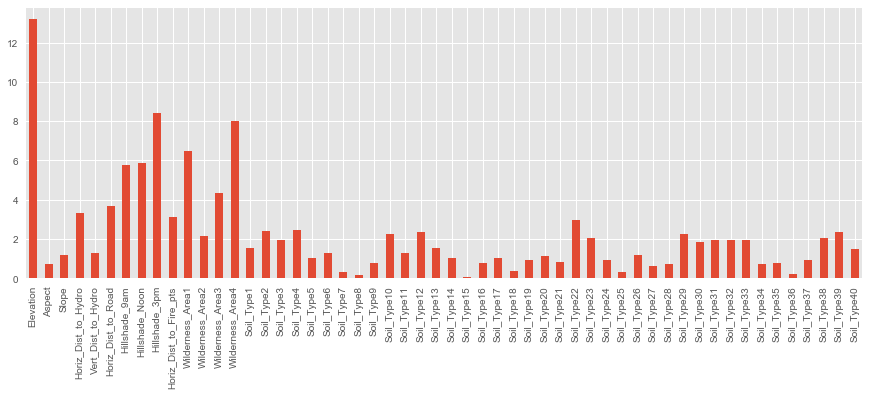

In [93]:
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(sum(abs(classifier2.coef_)), index = X.columns)
weights.plot(kind = 'bar')
plt.show()

A visual representaion of the magnitudes of the coefficients.

I again apply cross validation to obtain a mean accuracy score to aid in model comparison. I chose to only use 3 folds in this case due to processing time.

In [31]:
# Applying k-Fold Cross Validation                      
accuracies2 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 3, n_jobs = -1)
print('mean accuracy:',accuracies2.mean())
print('accuracy stddev:',accuracies2.std())

mean accuracy: 0.714900103696
accuracy stddev: 0.00109936701251


The accuracy did improve over the SVM model a little with less variation between the folds.

## PCA with Logistic Regression:

As an experiment I will also apply PCA to the Logistic Regression model. In this case I will only look at 2 components with the intention of representing them visually.

In [41]:
# Applying PCA with 2 components to vizualize
pca2 = PCA(n_components = 2)
X_trainPCA2 = pca2.fit_transform(X_train)
X_testPCA2 = pca2.transform(X_test)

In [42]:
# Fitting Logistic Regression to the PCA Training set
classifierLRPCA = LogisticRegression(random_state = 0, n_jobs = -1)
classifierLRPCA.fit(X_trainPCA2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
# Predicting the Test set results
y_predLRPCA = classifierLRPCA.predict(X_testPCA2)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmLRPCA = confusion_matrix(y_test, y_predLRPCA)
print(cmLRPCA)

[[ 9003 33201     8     0     0     0     0]
 [ 7448 48830   571     0     0     0     0]
 [    0  3413  3681     0     0     0     0]
 [    0   177   392     0     0     0     0]
 [   19  1867     0     0     0     0     0]
 [    0  1744  1758     0     0     0     0]
 [ 1736  2355     0     0     0     0     0]]


This confusion matrix is heavily skewed toward predicting the first few classes. Even if the accuracy turned out to be very high this matrix would be evidence for the accuracy paradox.

C:\Users\Abbott\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


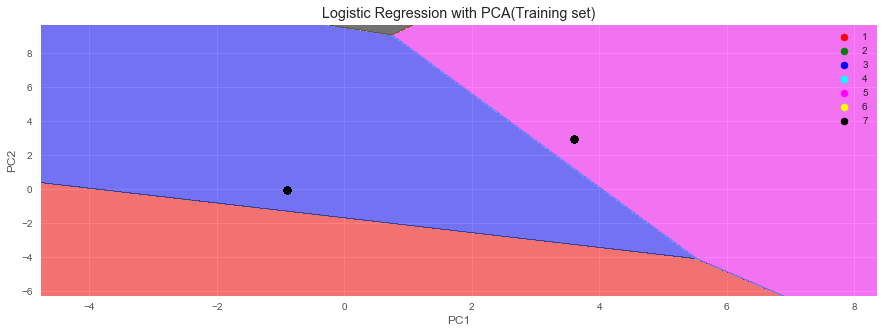

In [94]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_trainPCA2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierLRPCA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black'))(i), label = j)
plt.title('Logistic Regression with PCA(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Above is a visualization of the classification using only 2 principal components. Not all of the classes even appeared. Two components is not enough to get a good classification although it was interesting to see visually.

## Decision Tree:

The next model I will evaluate for classifying is a Decision Tree Classifier. This model also comes from scikit-learn. A good benefit of decision trees is that is requires very little assumptions, like normality, or data normalization.They also handle irrelevent variables well. 

In [98]:
# Fitting the decision tree to the training set
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [85]:
y_predDT = DTclassifier.predict(X_test)

# Making the Confusion Matrix
cmDT = confusion_matrix(y_test, y_predDT)
print(cmDT)

[[39768  2217     4     0    23     5   195]
 [ 2118 54270   125     2   194   106    34]
 [    1   148  6624    66    22   233     0]
 [    0     0    75   467     0    27     0]
 [   36   257     9     0  1580     4     0]
 [    3   126   253    17     2  3101     0]
 [  165    21     0     0     1     0  3904]]


Tnis confusion matrix is a big improvement on the previous models. I would expect the accuracy to also improve drastically. Here the cells off od the truth diagonal are very sparse compared to the other models looked at above.

In [86]:
# Applying k-Fold Cross Validation                      
accuraciesDT = cross_val_score(estimator = DTclassifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print('mean accuracy:',accuraciesDT.mean())
print('accuracy stddev:',accuraciesDT.std())

mean accuracy: 0.940569127752
accuracy stddev: 0.000878807084395


As expected, using a 10-fold cross validation, the average accuracy improved to 94%! That is very good. The decision tree does have parameters though, it may be possible to improve the performance further by tweaking the prameters. To do this I will use a grid search.

### Using Grid Search to find the best model parameters:

The main parameter in the decision tree is the criterion. The choices are 'gini' and 'entropy'. Entropy is a measure of impurity while gini 

In [87]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini'], 'max_depth': [None], 'min_samples_split': [2, 100, 1000], 'min_samples_leaf': [1, 10, 100],
              'max_features': [None], 'max_leaf_nodes': [None]},
              {'criterion': ['entropy'], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 100, 1000],
               'min_samples_leaf': [1, 10, 100], 'max_leaf_nodes': [None]}]
grid_search = GridSearchCV(estimator = DTclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [88]:
print('Best Accuracy:', best_accuracy)
print('Using these parameters:/n', best_parameters)

Best Accuracy: 0.940569137
Using these parameters:/n {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Those are actually the default parameters for the entropy criteria that I used. I will look more closely at the final model.

In [100]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### Interpretation of importances

In [102]:
# Interpreting weights
zip_varsDT = zip(DTclassifier.feature_importances_.T,X.columns) # combine attributes
zip_varsDT = sorted(zip_varsDT)
for importance, name in zip_varsDT:
    print(name, 'has weight of', importance) # now print them out

Soil_Type15 has weight of 0.0
Soil_Type18 has weight of 0.0
Soil_Type37 has weight of 0.0
Soil_Type7 has weight of 6.0436197377e-06
Soil_Type8 has weight of 1.0508009883e-05
Soil_Type25 has weight of 2.14910876411e-05
Soil_Type26 has weight of 7.40063849398e-05
Soil_Type28 has weight of 8.42679482004e-05
Soil_Type36 has weight of 9.69924202372e-05
Soil_Type1 has weight of 0.000116205461532
Soil_Type14 has weight of 0.000129356217334
Soil_Type27 has weight of 0.000270284955662
Soil_Type21 has weight of 0.000294983000277
Soil_Type6 has weight of 0.000334735248217
Soil_Type9 has weight of 0.000360361926112
Soil_Type34 has weight of 0.000422442340449
Soil_Type19 has weight of 0.000471471598329
Soil_Type5 has weight of 0.000491233697564
Soil_Type40 has weight of 0.000531978984969
Soil_Type16 has weight of 0.000680517863911
Soil_Type12 has weight of 0.000944983478337
Soil_Type35 has weight of 0.00105355406268
Soil_Type17 has weight of 0.00110268588187
Wilderness_Area4 has weight of 0.0013467

In the decision tree model, the importance of the variables are not the same as they were in the logistic regression model examined earlier. Elevation is still most important, but rather than hillshade and wilderness types, it is distance to roadways, fires, amd water that are next in importance. This result is interesting and mayb not intuitive, certainly not for a non-biologist.

In [112]:
from sklearn.tree import export_graphviz
import subprocess


def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [113]:
visualize_tree(DTclassifier, my_columns)

## Deployment

This deision tree model would be very useful for anyone seeking to learn the foliage cover type of a particular area of land using only map information. In other words this classifier allows someone to accurately predict the type of cover without requiring sensory presence at the location. Forestry and wildlife professionals are able with this classifier to gain knowledge of the landscape without disturbing it.

# Deployment Resubmittal

This decision tree or random forest model could be very useful for anyone seeking to identify the wilderness area of a particular set of characteristics. In other words this classifier allows someone to accurately predict the location, given a description of an environment. 
 
When the model is deployed it allows predictions to be easily available. An API will be used for the deployment. This data is not continuously arriving so training time is not a major concern.
 
The quality of the deployed models must also be measured and tracked in order to provide feedback necessary to improve the model. The quality of the model is measured offline by the accuracy, but precision-recall or the ROC curve would be other options. Online evaluation is however measured by the impact of the model until real labels can be ascribed to the data points. The live data and evaluation feedback are then used to update the model. 



# Classifier Task 2:

For the second classifier the goal is to predict the wilderness area for 30 x 30 meter cells from cartographic variables without need for remotely sensed data. The wilderness areas, the classes for the second task, are:  
1. Rawah Wilderness Area  
2. Neota Wilderness Area  
3. Comanche Peak Wilderness Area  
4. Cache la Poudre Wilderness Area

## Data Understanding

The data for this task needs some adjusting to fit the new classification goal. The four wilderness area variables will be combined into one new dependent variable and assigned to y2. The previous class variable, cover_type will now be one hot encoded into 4 binary variables and included with the independent variables as X2.

In [3]:
dataset2 = dataset

# perform one-hot encoding of the cover_type
tmp_df = pd.get_dummies(dataset2.Cover_Type,prefix='Cover_Type')
dataset2 = pd.concat((dataset2,tmp_df),axis=1) # add back into the dataframe
dataset2 = dataset2.drop(['Cover_Type'], axis = 1)

In [4]:

dataset2['Wilderness_Area'] = np.where(dataset2['Wilderness_Area1']==1,1,0)
dataset2['Wilderness_Area'] = np.where(dataset2['Wilderness_Area2']==1,2,dataset2['Wilderness_Area'])
dataset2['Wilderness_Area'] = np.where(dataset2['Wilderness_Area3']==1,3,dataset2['Wilderness_Area'])
dataset2['Wilderness_Area'] = np.where(dataset2['Wilderness_Area4']==1,4,dataset2['Wilderness_Area'])
dataset2 = dataset2.drop(['Wilderness_Area1'], axis = 1)
dataset2 = dataset2.drop(['Wilderness_Area2'], axis = 1)
dataset2 = dataset2.drop(['Wilderness_Area3'], axis = 1)
dataset2 = dataset2.drop(['Wilderness_Area4'], axis = 1)
X2 = dataset2.iloc[:, :-1]
y2 = dataset2.iloc[:, -1]

In [5]:
X2.describe().transpose()

count         mean          std     min     25%  \
Elevation               581012.0  2959.365301   279.984734  1859.0  2809.0   
Aspect                  581012.0   155.656807   111.913721     0.0    58.0   
Slope                   581012.0    14.103704     7.488242     0.0     9.0   
Horiz_Dist_to_Hydro     581012.0   269.428217   212.549356     0.0   108.0   
Vert_Dist_to_Hydro      581012.0    46.418855    58.295232  -173.0     7.0   
Horiz_Dist_to_Road      581012.0  2350.146611  1559.254870     0.0  1106.0   
Hillshade_9am           581012.0   212.146049    26.769889     0.0   198.0   
Hillshade_Noon          581012.0   223.318716    19.768697     0.0   213.0   
Hillshade_3pm           581012.0   142.528263    38.274529     0.0   119.0   
Horiz_Dist_to_Fire_pts  581012.0  1980.291226  1324.195210     0.0  1024.0   
Soil_Type1              581012.0     0.005217     0.072039     0.0     0.0   
Soil_Type2              581012.0     0.012952     0.113066     0.0     0.0   
Soil_Type3              581012.0     0.008301     0.090731     0.0     0.0   
Soil_Type4              581012.0     0.021335     0.144499     0.0     0.0   
Soil_Type5              581012.0     0.002749     0.052356     0.0     0.0   
Soil_Type6              581012.0     0.011316     0.105775     0.0     0.0   
Soil_Type7              581012.0     0.000181     0.013442     0.0     0.0   
Soil_Type8              581012.0     0.000308     0.017550     0.0     0.0   
Soil_Type9              581012.0     0.001974     0.044387     0.0     0.0   
Soil_Type10             581012.0     0.056168     0.230245     0.0     0.0   
Soil_Type11             581012.0     0.021359     0.144579     0.0     0.0   
Soil_Type12             581012.0     0.051584     0.221186     0.0     0.0   
Soil_Type13             581012.0     0.030001     0.170590     0.0     0.0   
Soil_Type14             581012.0     0.001031     0.032092     0.0     0.0   
Soil_Type15             581012.0     0.000005     0.002272     0.0     0.0   
Soil_Type16             581012.0     0.004897     0.069804     0.0     0.0   
Soil_Type17             581012.0     0.005890     0.076518     0.0     0.0   
Soil_Type18             581012.0     0.003268     0.057077     0.0     0.0   
Soil_Type19             581012.0     0.006921     0.082902     0.0     0.0   
Soil_Type20             581012.0     0.015936     0.125228     0.0     0.0   
Soil_Type21             581012.0     0.001442     0.037950     0.0     0.0   
Soil_Type22             581012.0     0.057439     0.232681     0.0     0.0   
Soil_Type23             581012.0     0.099399     0.299197     0.0     0.0   
Soil_Type24             581012.0     0.036622     0.187833     0.0     0.0   
Soil_Type25             581012.0     0.000816     0.028551     0.0     0.0   
Soil_Type26             581012.0     0.004456     0.066605     0.0     0.0   
Soil_Type27             581012.0     0.001869     0.043193     0.0     0.0   
Soil_Type28             581012.0     0.001628     0.040318     0.0     0.0   
Soil_Type29             581012.0     0.198356     0.398762     0.0     0.0   
Soil_Type30             581012.0     0.051927     0.221879     0.0     0.0   
Soil_Type31             581012.0     0.044175     0.205483     0.0     0.0   
Soil_Type32             581012.0     0.090392     0.286743     0.0     0.0   
Soil_Type33             581012.0     0.077716     0.267725     0.0     0.0   
Soil_Type34             581012.0     0.002773     0.052584     0.0     0.0   
Soil_Type35             581012.0     0.003255     0.056957     0.0     0.0   
Soil_Type36             581012.0     0.000205     0.014310     0.0     0.0   
Soil_Type37             581012.0     0.000513     0.022641     0.0     0.0   
Soil_Type38             581012.0     0.026803     0.161508     0.0     0.0   
Soil_Type39             581012.0     0.023762     0.152307     0.0     0.0   
Soil_Type40             581012.0     0.015060     0.121791     0.0     0.0   
Cover_Type_1            581012.0     0.364605    

The summary statistics above show:  
581,012 observations  
57 Attributes  

Of those 57 attributes there are 12 measures.   
10 quantitative measures  
7 binary cover type type indicators  
40 binary soil type indicators  

The dependent variable is Wilderness_Area and is an integer from 1 to 4.  

Luckily there are no missing values or outliers.

## Training and Testing Split:

I use train_test_split from scikit-learn's model_selection to split the data into training and test sets. I assigned the independent variables to X2 and the dependent variable to y2 above. Using those as inputs, the following command creates training and test sets of X2 and y2. I use 80% of the data for training and 10% for test.

In [10]:
# Splitting the dataset into the Training set and Test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

## Feature Scaling:

Because the variables are not all on the same scale, some variables could be given more importance than they warrant. To prevent this I will rescale all of the independent variables to be on the same scale using scikit-learn.preprocessing StandardScaler.

In [11]:
# Feature Scaling
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [12]:
X2_train

array([[-1.84064495, -1.35478696,  0.1206809 , ..., -0.12898899,
        -0.17534712, -0.19135746],
       [ 1.41287262, -0.53258265,  1.18912469, ..., -0.12898899,
        -0.17534712, -0.19135746],
       [ 0.10218003,  1.54973913, -1.34842932, ..., -0.12898899,
        -0.17534712, -0.19135746],
       ..., 
       [-1.41565198, -0.23766154, -0.68065195, ..., -0.12898899,
        -0.17534712, -0.19135746],
       [ 1.29501743,  0.73647182, -0.01287458, ..., -0.12898899,
        -0.17534712, -0.19135746],
       [-1.70493291,  0.91521189,  1.58979111, ..., -0.12898899,
        -0.17534712, -0.19135746]])

The training and test sets of X2 are now all scaled the same and ready to apply models to.

## Decision Tree:

The first model I will evaluate for the second classifier task is a Decision Tree Classifier. This model also comes from scikit-learn. A good benefit of decision trees is that is requires very little assumptions, like normality, or data normalization.They also handle irrelevent variables well. 

In [152]:
# Fitting the decision tree to the training set
DTclassifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier2.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [153]:
y2_predDT = DTclassifier2.predict(X2_test)

# Making the Confusion Matrix
cmDT2 = confusion_matrix(y2_test, y2_predDT)
print(cmDT2)

[[51824    24   139     0]
 [   43  5846    59     0]
 [  139    46 50660    76]
 [    0     0    55  7292]]


Tnis confusion matrix looks pretty good. I would expect the accuracy to also impress. Here the cells off of the truth diagonal are very sparse compared values on the correct prediction diagonal.

In [154]:
# Applying k-Fold Cross Validation                      
accuraciesDT2 = cross_val_score(estimator = DTclassifier2, X = X2_train, y = y2_train, cv = 10, n_jobs = -1)
print('mean accuracy:',accuraciesDT2.mean())
print('accuracy stddev:',accuraciesDT2.std())

mean accuracy: 0.994105105673
accuracy stddev: 0.000182804400121


### Using Grid Search to find the best model parameters:

The main parameter in the decision tree is the criterion. The choices are 'gini' and 'entropy'. Entropy is a measure of impurity while gini 

In [155]:
# Applying Grid Search to find the best model and the best parameters
parameters = [{'criterion': ['gini'], 'max_depth': [None], 'min_samples_split': [2, 100, 1000], 'min_samples_leaf': [1, 10, 100],
              'max_features': [None], 'max_leaf_nodes': [None]},
              {'criterion': ['entropy'], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 100, 1000],
               'min_samples_leaf': [1, 10, 100], 'max_leaf_nodes': [None]}]
grid_search = GridSearchCV(estimator = DTclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search2 = grid_search.fit(X2_train, y2_train)
best_accuracy = grid_search2.best_score_
best_parameters = grid_search2.best_params_

In [156]:
print('Best Accuracy:', best_accuracy)
print('Using these parameters:/n', best_parameters)

Best Accuracy: 0.994105105538
Using these parameters:/n {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Those are actually the default parameters for the entropy criteria that I used. I will look more closely at the final model.

In [157]:
DTclassifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier2.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### Interpretation of importances

In [158]:
# Interpreting weights
zip_varsDT2 = zip(DTclassifier2.feature_importances_.T,X2.columns) # combine attributes
zip_varsDT2 = sorted(zip_varsDT2)
for importance, name in zip_varsDT2:
    print(name, 'has weight of', importance) # now print them out

Cover_Type_5 has weight of 0.0
Soil_Type15 has weight of 0.0
Soil_Type25 has weight of 0.0
Soil_Type28 has weight of 0.0
Soil_Type7 has weight of 0.0
Soil_Type8 has weight of 0.0
Soil_Type36 has weight of 1.35428681461e-05
Soil_Type17 has weight of 2.32706749865e-05
Soil_Type14 has weight of 2.93529011945e-05
Cover_Type_4 has weight of 3.59624096603e-05
Soil_Type3 has weight of 4.34757418218e-05
Soil_Type2 has weight of 9.70045981631e-05
Soil_Type27 has weight of 0.000111689569442
Soil_Type37 has weight of 0.000112477896155
Soil_Type18 has weight of 0.000194086020904
Cover_Type_6 has weight of 0.000269726982395
Soil_Type4 has weight of 0.00040543361599
Soil_Type11 has weight of 0.000435732625915
Soil_Type5 has weight of 0.000487516517681
Soil_Type34 has weight of 0.000540057558555
Soil_Type26 has weight of 0.000553258932586
Soil_Type35 has weight of 0.000578865109289
Soil_Type21 has weight of 0.000732857562011
Cover_Type_3 has weight of 0.00081636223532
Soil_Type1 has weight of 0.00086

In the decision tree model, the importance of the variables are very similar to what they were in the first classification task examined earlier. Elevation is still most important, but soil types have taken on greater importance. Distance to roadways and fires are next in importance. This result is interesting. It makes sense that variables that are very specific to particular locations would predict the area. Combinations of those areas would be unique to wilderness area classes.

## K Nearest Neighbors:

The next classifier model I will use is the K-nearest-neighbor classifier. To use this classifier, first I choose the number of neighbors to use. I will choose 3 to try to keep processing time within reason. Next, for each new data point, the model takes the K (3) nearest neighbors as measured by the Euclidean distance (by default). For those K nearest neighbors, the model then counts the class of each and assigns the most common class to the new data point.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3, n_jobs = -1)
clf.fit(X2_train,y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
y_predKNN = clf.predict(X2_test)

In [28]:
from matplotlib import pyplot as plt
# Making the Confusion Matrix
cmKNN2 = confusion_matrix(y2_test, y_predKNN)
total_accuracy = mt.accuracy_score(y2_test, y_predKNN)
print ('KNN accuracy', total_accuracy)
plt.imshow(cmKNN2,cmap=plt.get_cmap('Reds'),aspect='auto')

KNN accuracy 0.992452862663


In [29]:
print(cmKNN2)

[[51763    51   173     0]
 [   66  5828    54     0]
 [  229    64 50492   136]
 [    1     0   103  7243]]


The K nearest neighbors model is not ideal for large data sets such as this one. It checks the Euclidean distance between each point, so with so many points the processing time increases dramaticaly. The accuracy for this model was also above 99.2% with a very well balanced confusion matrix. I would not choose this model for this task based on the time it takes to run.

## Random Forest:

The Random Forest model combines multiple decision trees, hence a forest. This ensemble classifier first picks a random number of points from the training set. Then a decision tree is built using those data points. This process is repeated a chosen number of times. To classify a new point, the class predicted the most by the multiple trees is assigned.

In [14]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(criterion = 'entropy', max_depth=50, n_estimators=10, n_jobs=-1)
RFclf.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt
y2_predRF = RFclf.predict(X2_test)
# Making the Confusion Matrix
cmRF2 = confusion_matrix(y2_test, y2_predRF)
print(cmRF2)
total_accuracyRF = mt.accuracy_score(y2_test, y2_predRF)
print ('Accuracy', total_accuracyRF)

[[51843    22   122     0]
 [   44  5831    73     0]
 [  300    45 50530    46]
 [    0     0    45  7302]]
Accuracy 0.994001876027


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


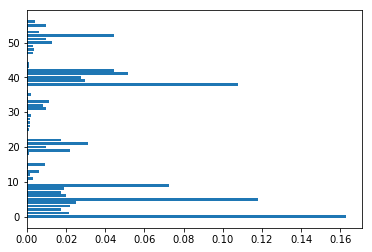

In [22]:
# now lets get access to the different properties of our RF

print (RFclf)

plt.barh(range(len(RFclf.feature_importances_)), RFclf.feature_importances_)
plt.show()

In [23]:
# Interpreting weights
zip_varsRF2 = zip(RFclf.feature_importances_.T,X2.columns) # combine attributes
zip_varsRF2 = sorted(zip_varsRF2)
for importance, name in zip_varsRF2:
    print(name, 'has weight of', importance) # now print them out

Soil_Type15 has weight of 0.0
Soil_Type7 has weight of 4.75033889823e-10
Soil_Type8 has weight of 5.69361866702e-08
Soil_Type36 has weight of 1.54754323596e-05
Soil_Type37 has weight of 0.000147133558219
Soil_Type14 has weight of 0.000152285641962
Soil_Type28 has weight of 0.000200027238722
Soil_Type5 has weight of 0.000341864185442
Soil_Type21 has weight of 0.000434874462652
Soil_Type27 has weight of 0.000551356637665
Soil_Type25 has weight of 0.000601812991458
Cover_Type_5 has weight of 0.000613980222251
Soil_Type1 has weight of 0.000786289960906
Soil_Type16 has weight of 0.000831717360894
Soil_Type34 has weight of 0.000927883928736
Soil_Type35 has weight of 0.00097781786547
Soil_Type9 has weight of 0.00120688677587
Soil_Type17 has weight of 0.00135432755268
Soil_Type19 has weight of 0.00138316332323
Soil_Type18 has weight of 0.0014169903948
Soil_Type3 has weight of 0.00172801591668
Soil_Type26 has weight of 0.00210135845681
Soil_Type20 has weight of 0.00229473884787
Soil_Type2 has w

As I would expect, a random forest of decision trees places about the same importance on each variable as the single decision tree. The accuracy was also 99.4% which also makes sense.

## Deployment

This deision tree or random forest model could be very useful for anyone seeking to identify the wilderness area of a particular set of characteristics. In other words this classifier allows someone to accurately identify the location, given a description of an environment. 

# Deployment Resubmittal

This decision tree or random forest model could be very useful for anyone seeking to identify the wilderness area of a particular set of characteristics. In other words this classifier allows someone to accurately predict the location, given a description of an environment. 
 
When the model is deployed it allows predictions to be easily available. An API will be used for the deployment. This data is not continuously arriving so training time is not a major concern.
 
The quality of the deployed models must also be measured and tracked in order to provide feedback necessary to improve the model. The quality of the model is measured offline by the accuracy, but precision-recall or the ROC curve would be other options. Online evaluation is however measured by the impact of the model until real labels can be ascribed to the data points. The live data and evaluation feedback are then used to update the model. 

